<a href="https://colab.research.google.com/github/carvalheirafc/imd0033_2018_2/blob/master/aula26/Lesson_26_Measures_of_Variability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - The Range

So far we've focused entirely on summarizing distributions using the **mean**, the **weighted mean**, the **median**, and the **mode**. An interesting distribution property we haven't yet discussed is **variability**. Consider, for instance, these two distributions of numerical values:


<img width="150" src="https://drive.google.com/uc?export=view&id=1oLZvk-JGfbK9vrxSW3vOgyRKKGhWHHVN">


The values of the distribution A don't vary — each value is 4. The values in distribution B  show some variability — they are not all identical, and the values can be either 8 or 0. **If we were to quantify variability**, we could assign a value of 0 to A to indicate that it has no variability. But **what variability value should we assign to distribution B?**

We need a measure to summarize the **variability** of these two distributions. The summary metrics we've learned so far don't tell us anything about variability. The **mean**, the **median**, and the **mode** of distribution A are all 4, and distribution B has a **mean** and a **median** of 4, and **no mode**. If we were to judge variability based on these values, we'd probably have to conclude that the variabilities of the two distributions are equal, which is wrong.

One intuitive way to measure the variability of a distribution is to find the **difference between the maximum and the minimum value**. Both the maximum and the minimum of distribution  A is 4, so the variability of distribution  is 0:

$$
max(A) - min(A) = 4 - 4 = 0
$$

We call this measure of variability the **range**. So the range of distribution A is 0. The range of distribution B  is 8:

$$
max(B) - min(B) = 8 - 0 = 8
$$

In more general terms, the range of distribution X, where  X can be any distribution of real numbers, is:

$$
range(X) = max(X) - min(X)
$$


We'll continue working in this mission with the data set on house prices we used for the last three lessons. Here's a short extract from the data set to help you recollect its structure:


| | Order | PID | MS SubClass | MS Zoning | Lot Frontage | Lot Area | Street | Alley | Lot Shape | Sale Condition | SalePrice |        
|-------|-----|-------------|-----------|--------------|----------|--------|-------|-----------|----------------|-----------|--------|
| 0     | 1   | 526301100   | 20        | RL           | 141.0    | 131770 | Pave  | NaN       | WD             | Normal    | 215000 |
| 1     | 2   | 526350040   | 20        | RH           | 80.0     | 11622  | Pave  | NaN       | WD             | Normal    | 105000 |
| 2     | 3   | 526351010   | 20        | RL           | 81.0     | 14267  | Pave  | NaN       | WD             | Normal    | 172000 |
| 3     | 4   | 526353030   | 20        | RL           | 93.0     | 11160  | Pave  | NaN       | WD             | Normal    | 244000 |
| 4     | 5   | 527105010   | 60        | RL           | 74.0     | 13830  | Pave  | NaN       | WD             | Normal    | 189900 |


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Write a function that takes in an array of numerical values and returns the range of that array.

- Using the function you wrote, measure the range of the **SalePrice** variable for each year of sales. You can find the year of sale in the **Yr Sold** column.
  - Store the measures in a dictionary named **range_by_year**. The keys should be the individual years, and the dictionary values should be the ranges. This is how the dictionary should look like: **{2010: 598868, 2009: 575100, 2008: 601900,...}**.
- Using the measures of **variability** you got, asses the truth value of the following sentences:
  - Prices had the greatest variability in 2008.
    - If you consider this sentence true, assign the boolean **True** to a variable named **one**, otherwise assign **False**.
  - Prices variability had a peak in 2007, then the variability started to decrease until 2010 when there was a short increase in variability compared to the previous year (2009).
    - If you consider this sentence true, assign the boolean **True** to a variable named **two**, otherwise assign **False**.



In [0]:
import pandas as pd
houses = pd.read_table('AmesHousing_1.txt')

def get_range(iterable_object):
  return max(iterable_object) - min(iterable_object)

In [0]:
years = houses['Yr Sold'].unique()
years.sort()

In [28]:
range_by_year = {}

for year in years:
  range_by_year[year] = get_range(houses[houses['Yr Sold'] == year]['SalePrice'])

range_by_year

{2006: 590000, 2007: 715700, 2008: 601900, 2009: 575100, 2010: 598868}

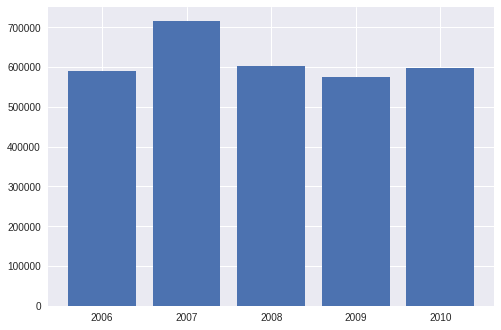

In [29]:
import matplotlib.pyplot as plt

labels = list(range_by_year.keys())
plt.bar(range(len(labels)),range_by_year.values(),tick_label=labels)

one = False
two = True

# 2 - The Average Distance

The problem with the **range** is that it considers only two values in the distribution — the **minimum** and the **maximum** value. Consider this distribution C:

$$
C = [1,1,1,1,1,1,1,1,1,21]
$$

We can see there's not much **variability** in distribution C - we have nine values of 1, and a single value of 21. Intuitively, we'd expect the variability of distribution C to be greater than 0 because there is some variability after all, but not much greater than 0 (remember from the last screen that a distribution whose values don't vary should ideally have a variability of 0).

Despite our expectations, the range indicates that the variability of distribution  C is 20.

$$
max(C) - min(C) = 21 - 1 = 20
$$

This is signficantly greater than 0 and doesn't seem like a reasonable measure of variability for distribution C. The root of the problem is that the range considers only the two extreme values, and this makes it extremely sensitive to outliers. To get a more balanced measure of variability for distribution C, we need to take into account each value in the distribution.


To take into account each value when measuring variability we could:

1. Take a reference value, and measure the distance of each value in the distribution from that reference value.
  - We can take the mean of the distribution as a reference value.
  - Then, we measure the distance between each value in the distribution and the mean.
2. Find the mean of the distances.
  - We first need to sum up all the distances.
  - Then we need to divide the total by the number of distances.
  
<img width="300" src="https://drive.google.com/uc?export=view&id=1F6z138WEkF049XXla0fYXXAqV4OMjKug">


By measuring the distance of each value relative to a reference point and then taking the mean of the distances, we practically measure how much the values of a distribution vary on average with respect to that reference point.

It's also very easy to define algebraically this method for any population of values  $[x_1,x_2,\ldots,x_N]$ with mean $\mu$:


<img width="500" src="https://drive.google.com/uc?export=view&id=1pPKfQKYjX_6eLDjJxgAQwNoS681AG0wj">

We'll continue discussing about this method in the next screen, but now let's use the formula above to measure the variability of distribution C.



**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Write a function that takes in a numerical array and returns the average distance (as explained above). Inside the function's defition:
  - Compute the mean of the array.
  - Initialize an empty list.
  - Loop through the values of the array. For each iteration:
    - Compute the distance between the current value and the mean. Use **value - mean** every time, as indicated by the formula.
    - Append the distance to the list we initialized before the loop.
  - At the end of the loop, the list should contain all the distances.
  - Return the mean of the list.
- Compute the average distance for distribution C  using the function you wrote, and assign the result to a variable named **avg_distance.**
- Print the result. Why do you think we got that value? (Hint: The mean is the balance point of a distribution.)


In [33]:
C = [1,1,1,1,1,1,1,1,1,21]

def average_distance(iterable):
  iterable_mean = sum(iterable)/len(iterable)
  distances = []
  for it in iterable:
    distances.append(it - iterable_mean)
    
  return sum(distances)/len(distances)  

avg_distance = average_distance(C)
avg_distance

0.0

# 3 -Mean Absolute Deviation


In the last exercise the average distance was 0. This is because the **mean** is the **balance point** of the distribution and, as we've learned, the total distance of the values that are above the mean is the same as the total distance of the values below the mean. The mean $\mu$ of the distribution  C is 3, so we have:

<img width="400" src="https://drive.google.com/uc?export=view&id=1nZHuW_kHSzl9h8lUWx6P7rflshCkjcQm">


Plugging the distances into the formula we used in the previous screen will make the numerator amount to 0, which in turn will make the average distance 0:

$$
\text{average distance} = \frac{-18 + 18}{10} = \frac{0}{10}
$$

To solve this problem, we can take the absolute value of each distance, and then sum up the absolute values. The **absolute value** (also called **modulus**) of a number is the positive version of that number, regardless of its sign. For instance, the absolute value of -7 is +7, and the absolute value of +7 is +7. In mathematical notation we write:

$$
|-7| = +7\\
|+7| = +7
$$

We'll update the formula used previously to reflect the fact the we're summing up the absolute distances instead:

$$
\text{mean absolute distance} = \frac{|x_1 - \mu| + |x_2 - \mu| + \ldots + |x_N - \mu|}{N} = \frac{\displaystyle \sum_{i=1}^{N} |x_i - \mu|}{N}
$$

We call this measure of variability **mean absolute distance**. In statistical jargon, however, the distance of a value from the mean is called **deviation**. So the mean absolute distance is more commonly known as **mean absolute deviation** or **average absolute deviation.**

Let's take the mean absolute deviation of distribution C  and see whether this metric does better than the range. Remember that the range is 20, but we expect a smaller value (which is greater than 0 at the same time).


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Write a function that takes in a numerical array and returns the **mean absolute deviation**. Inside the function:
  - Compute the **mean** of the array.
  - Loop through the values of the array. For each iteration:
    - Compute the absolute distance (deviation). You can use the **abs()** function.
    - Append the absolute distance to a list.
  - Return the mean of the list containing all the absolute distances.
- Compute the mean absolute deviation of distribution C, and assign the result to a variable named **mad**.
  - Is the result considerably less than 20 but greater than 0, as we expected?

In [36]:
C = [1,1,1,1,1,1,1,1,1,21]

def get_mean_absolute_deviation(iterable):
  iterable_mean = sum(iterable)/len(iterable)
  absolute_dev = []
  for it in iterable:
    absolute_dev.append(abs(iterable_mean - it))
    
  return sum(absolute_dev)/len(absolute_dev)  

mad = get_mean_absolute_deviation(C)
mad

3.6

# 4- Variance

In the previous screen we transformed the distances to absolute values to avoid having the sum of distances amount to 0 in the numerator. Another way to solve this problem is to square each distance and then find the mean of all the squared distances:

$$
\text{mean squared distance} = \frac{(x_1 - \mu)^2 + (x_2 - \mu)^2 + \ldots + (x_N - \mu)^2}{N} = \frac{\displaystyle \sum_{i=1}^{N} (x_i - \mu)^2}{N}
$$

This measure of variability is sometimes called **mean squared distance** or **mean squared deviation** (remember that "distance" and "deviation" are synonymous in this context). However, it's more commonly known as **variance.**

Squaring the distances or taking their absolute values ensure that we get a variability value that is greater than 0 for all distributions that show some variability. Notice, however, that variance and mean absolute deviation will still be 0 for distributions that show no variability.

Consider distribution $D = [2,2,2]$ , which has a variance and a mean absolute deviation of 0:

<img width="500" src="https://drive.google.com/uc?export=view&id=1eWnhIv6R4izaRdpppfF2oIqw-F-fUpI3">


In the previous exercise, we got a mean absolute deviation of 3.6 for our distribution $C = [1,1,1,1,1,1,1,1,1,21]$. A value of 3.6 fitted well our expectations because we had expected a variability value greater than 0, but significantly less than 20. Let's see how well variance does with measuring the variability of distribution C.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Write a function that takes in a numerical array and returns the variance of that array. Inside the function:
  - Compute the mean of the array.
  - Loop through the values of the array. For each iteration:
    - Compute the squared distance (squared deviation).
    - Append the squared distance to a list.
  - Return the mean of the list of squared distances.
- Compute the variance of distribution C, and assign the result to a variable named **variance_C.**
  - Is the result considerably less than 20 but greater than 0, as we expected?


In [39]:
C = [1,1,1,1,1,1,1,1,1,21]

def get_variance(iterable):
  iterable_mean = sum(iterable)/len(iterable)
  computed_list = []
  for it in iterable:
    computed_list.append(pow(it - iterable_mean , 2))
    
  return sum(computed_list)/len(computed_list) 

variance_C = get_variance(C)
variance_C

36.0

# 5 - Standard Deviation

In the previous exercise, we got a variance of 36 for distribution $C = [1,1,1,1,1,1,1,1,1,21]$ , which was much more than we had expected. This high variability value is the direct result of the squaring process, which makes most distances much bigger than they actually are.

Squaring the distances also has the drawback of squaring the units of measurement. Let's consider this small sample from the **Bedroom AbvGr** variable (which describes the number of bedrooms in a house):

$$
[0,7,8]
$$

For computational purposes, and sometimes for simplicity, we tend to leave out the units of measurement in practice, but theoretically we should write out the units of measurement:

$$
[\text{0 bedroom}, \text{1 bedrooms}, \text{2 bedrooms}]
$$

The units of measurement are subject to algebraic operations, so the variance of the sample above will be (for formatting purposes, we'll abbreviate "bedrooms" with "b"):


<img width="400" src="https://drive.google.com/uc?export=view&id=1wyImzSVrOO4ydqCuE4nRwtwvTY5rcxOj">


The variance of this distribution is $12.\overline{6}$, which is very counterintuitive ($12.\overline{6}$ is the abbrevation for  $12.6666\ldots 666\ldots$). To solve this problem and also reduce the variability value, we can take the square root of variance.

$$
\sqrt{variance} = \sqrt{12.\overline{6} \ \ bedrooms^2} = 3.6 \ \ bedrooms
$$

The square root of variance is called **standard deviation** (remember that "deviation" is synonymous with "distance"), and it can be expressed like this in an algebraic definition:

$$
\text{standard deviation} = \sqrt{\frac{(x_1 - \mu)^2 + (x_2 - \mu)^2 + \ldots + (x_N - \mu)^2}{N}} = \sqrt{\frac{\displaystyle \sum_{i=1}^{N} (x_i - \mu)^2}{N}}
$$

Notice that the standard deviation is simply the square root of variance:

$$
\sqrt{variance} = standard \ \ deviation
$$

Let's return to our distribution $C=[1,1,1,1,1,1,1,1,1,21]$, and see how well standard deviation does on measuring its variability.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Write a function that takes in a numerical array and returns the standard deviation of that array. Inside the function:
  - Compute the mean of the array.
  - Loop through the values of the array. For each iteration:
    - Compute the squared distance (squared deviation).
    - Append the squared distance to a list.
  - Compute the mean of the list of squared distances — this is the variance.
  - Return the square root of the variance.
- Compute the standard deviation of distribution C, and assign the result to a variable named **standard_deviation_C.**
- Is the result considerably less than 20 but greater than 0, as we expected?

In [42]:
from math import sqrt
C = [1,1,1,1,1,1,1,1,1,21]

def get_standard_deviation(iterable):
  iterable_mean = sum(iterable)/len(iterable)
  computed_list = []
  for it in iterable:
    computed_list.append(pow(it - iterable_mean , 2))
    
  return sqrt(sum(computed_list)/len(computed_list)) 

standard_deviation_C = get_standard_deviation(C)
standard_deviation_C

6.0

# 6 - Average Variability Around the Mean

In practice, **standard deviation** is perhaps the most used measure of variability. Let's try to get a better understanding of it by measuring the variability of the **SalePrice** variable in our data set. We'll use the **standard_deviation()** function we wrote for the previous exercise:

In [0]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

In [44]:
standard_deviation(houses['SalePrice'])

79873.05865192247

**Standard deviation** tells us how much the values in a distribution vary (on average) around the mean of that distribution. The mean of the SalePrice variable is approximately 180,796:

In [45]:
houses['SalePrice'].mean()

180796.0600682594

The **mean** tells us that the **average price** of a house is roughly 180,796, but this doesn't mean that each house (or most of them) costs exactly 180,796. One house could cost 120,000, another 240,000, and it could be that no house actually costs exactly 180,796. The **standard deviation** gives us a picture about this variability around the mean sale price. So, on average, sale prices vary by roughly 79,873 above and below a mean of 180,796.

Below, we'll try to visualize this variability around the mean by:

- Generating a histogram for the distribution of the **SalePrice** variable.
- Using vertical lines to mark the mean and the average deviations above and below the mean.

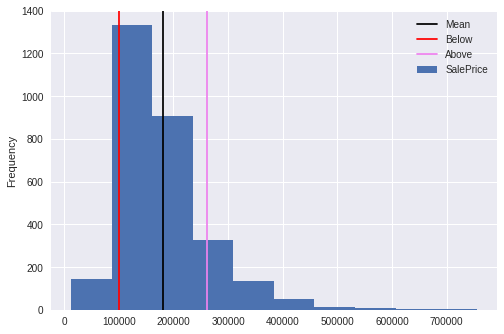

In [46]:
import matplotlib.pyplot as plt

mean = houses['SalePrice'].mean()
st_dev = standard_deviation(houses['SalePrice'])
houses['SalePrice'].plot.hist()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - st_dev, color = 'Red', label = 'Below')
plt.axvline(mean + st_dev, color = 'Violet', label = 'Above')
plt.legend()

Notice in the histogram that prices can vary around the mean much more or much less than 79,873. Some outliers around 700,000 are more than 500,000 above the mean and a couple of houses around 30,000 are more than 150,000 below the mean. The standard deviation doesn't set boundaries for the values in a distribution: the prices can go above and below the mean more than 79,873.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- The standard deviation of the **SalePrice** variable should give us a picture about the diversity of prices on the real estate market.
  - Find the year with the greatest variability of prices and assign the answer as an integer to the variable **greatest_variability.**
  - Find the year with the lowest variability of prices and assign the answer as an integer to the variable **lowest_variability.**
  - Use the function you wrote in the previous screen to measure the standard deviation of each year.
  - You can find information about the years of sale in the **Yr Sold** column.
  - There are many ways you can solve this exercise. If you get stuck, you can check the hint or the solution code.
- tip: max(years, key = years.get), where years is a dictionary.


In [52]:
years = houses['Yr Sold'].unique()
years.sort()
range_by_year = {}

for year in years:
  range_by_year[year] = get_standard_deviation(houses[houses['Yr Sold'] == year]['SalePrice'])

range_by_year

{2006: 82553.57563561267,
 2007: 82483.28433288915,
 2008: 75531.94622558328,
 2009: 80794.39070298373,
 2010: 74521.920711871}

# 7 -  A Measure of Spread

Another way to understand **standard deviation** is as a measure of spread in a distribution — values in a distribution can be more or less spread. We took four random samples of 50 sample points each from the **SalePrice** distribution, and plotted their histograms to visualize the spread for each sample:

<img width="500" src="https://drive.google.com/uc?export=view&id=1JRlXfYk9guthhb9IztYdWztEPD-Omw6s">


According to our visual estimates, sample 2 has the biggest spread, while the other three samples have a similar spread, with sample 3 seemingly having the lowest spread. The **standard deviations** of these four distributions fit our visual estimates fairly well:


In [53]:
for i in range(1,5):
      sample = houses['SalePrice'].sample(50, random_state = i)
      # we used the same random states for the samples in the graph above
      st_dev = standard_deviation(sample)
      print('Sample ' + str(i) + ': ' + str(st_dev))

Sample 1: 81785.0811515768
Sample 2: 100370.62998094413
Sample 3: 60676.038515710636
Sample 4: 64436.40016450328



**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- We took two samples of 50 sample points each from the distribution of the **Year Built** variable. Examine the graph below, and estimate visually which sample has a bigger spread.
  - Assign your answer to a variable named **bigger_spread**. If you think sample 1 has a bigger spread, assign the string **'sample 1'** to **bigger_spread**, otherwise assign **'sample 2'**.
  - Sanity check your visual estimate by computing and comparing the **standard deviations** of the two samples.
    - You can see the two samples already saved in the code editor.
    - Assign the standard deviation of sample 1 to a variable named **st_dev1**. Compute the standard deviation using the **standard_deviation()** function.
    - Assign the standard deviation of sample 2 to a variable named **st_dev2**. Compute the standard deviation using the **standard_deviation()** function.


<img width="400" src="https://drive.google.com/uc?export=view&id=1LGf0paBBpbTq9rmwjOLxm-W1VzcncTxf">



In [56]:
sample1 = houses['Year Built'].sample(50, random_state = 1)
sample2 = houses['Year Built'].sample(50, random_state = 2)

def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)
  

  
bigger_spread = 'sample_2'
std_dev1 = standard_deviation(sample1)
std_dev2 = standard_deviation(sample2)
print(std_dev1)
print(std_dev2)

29.239589600403075
32.466234767832255


# 8 - The Sample Standard Deviation

In practice, **we generally work with samples**, but most of the time we're not actually interested in describing the samples. Rather, we want to use the samples to make inferences about their corresponding populations. **Let's find out whether the standard deviation of a sample is a good estimate for the standard deviation in the corresponding population**.

Remember that we defined the standard deviation (SD) as:


$$
SD = \sqrt{\frac{(x_1 - \mu)^2 + (x_2 - \mu)^2 + \ldots + (x_N - \mu)^2}{N}} = \sqrt{\frac{\displaystyle \sum_{i=1}^{N} (x_i - \mu)^2}{N}}
$$

Notice in the formula that we used the population mean $\mu$, which means that if we wanted to compute the standard deviation of a sample, we'd have to know $\mu$. In practice,  $\mu$ is almost never known, and we can't find it from our sample either, but we can estimate $\mu$ using the sample mean $\overline{x}$.

We update slightly the formula for the sample standard deviation by changing  to  and  to  (remember that  describes the number of data points in a population, while  describes the number of data points in a sample):


$$
SD_{sample} = \sqrt{\frac{(x_1 - \overline{x})^2 + (x_2 - \overline{x})^2 + \ldots + (x_n - \overline{x})^2}{n}} = \sqrt{\frac{\displaystyle \sum_{i=1}^{n} (x_i - \overline{x})^2}{n}}
$$

Now that we have a working formula, can use it to reliably estimate the population standard deviation? One way we can check this is by sampling repeatedly a known population and see how the sample standard deviations compare on average to the population standard deviation.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Let's consider the data we have for **SalePrice** a population and sample it 5000 times. For each of the 5000 iterations of a for loop:
  - Sample 10 data points from the **SalePrice** variable using the **Series.sample()** method.
    - The **random_state** of **Series.sample()** should be 0 for the first iteration, 1 for the second iteration, 2 for the third, and so on.
  - Compute the standard deviation of the sample using the **standard_deviation()** function.
  - Append the standard deviation to a list that will eventually store all the 5000 sample standard deviations.
- Generate a histogram using **plt.hist()** to visualize the distribution of the 5000 sample standard deviations.
- Draw a vertical line using **plt.axvline()** to mark the population standard deviation.
- Examine the histogram and try to figure out whether most sample standard deviations cluster above or below the population standard deviation, or right at the center of it.

In [0]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

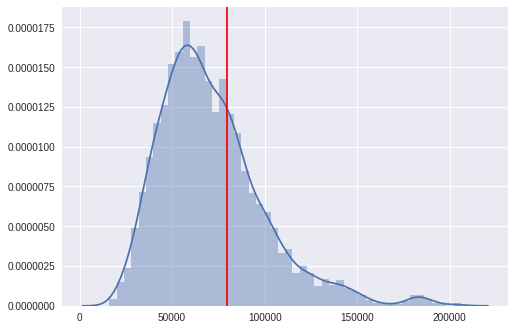

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax  = plt.subplots()

standard_deviation_list = []
for it in range(5000):
  sample = houses['SalePrice'].sample(n=10, random_state=it)
  standard_deviation_list.append(standard_deviation(sample))

ax = sns.distplot(standard_deviation_list)  
ax.axvline(x=standard_deviation(houses['SalePrice']), color='red')

# 9 -Bessel's Correction

In the last exercise, we plotted the histogram of 5000 sample standard deviations and compared them against the population standard deviation. Notice that most sample standard deviations are clustered below the population standard deviation:

<img width="400" src="https://drive.google.com/uc?export=view&id=1j5P6v31Q-FtsIxE8SATNBIv2iG4gmpAt">

This suggests that the sample standard deviation usually underestimates the population standard deviation. We can also see that the mean of the 5000 sample standard deviations is below the population standard deviation:

In [64]:
#st_devs - a list with all the 5000 st. deviations
sum(st_devs) / 5000 

NameError: ignored

In [0]:
standard_deviation(houses['SalePrice'])

79873.05865192247

So we can say that the sample standard deviation underestimates on average the population standard deviation. Some sample standard deviations are lower than the population standard deviation, some are greater, some may even be equal to the population standard deviation, but on average the sample standard deviation is lower than the population standard deviation.

We can get a good intuition for why the sample standard deviation underestimates if we think in terms of distribution spread. When we sample a population, it's generally more likely to get a sample with a spread that's lower than the population's spread. This generally translates to a lower standard standard deviation than in the population.

<img width="600" src="https://drive.google.com/uc?export=view&id=1DcLZ_g1qhY5CHg7IGj30U8y0beDDvMIW">

Getting a sample with a higher standard deviation than in the population is possible, but this is less likely. This is mostly specific to samples with a high spread and no clusters.

<img width="300" src="https://drive.google.com/uc?export=view&id=1_KZdDxi3M2tsQDbYJbJep1qAuoSe7Mrl">

To correct the underestimation problem, we can try to slightly modify the sample standard deviation formula to return higher values. One way to do that is to decrease the value of the denominator. For instance, in $\frac{12}{6} = 2$, the denominator is 6. If we decrease the value of the denominator, we get a greater result: $\frac{12}{4}=3$.

We'll decrease by 1 the denominator in the sample standard deviation formula, which now becomes:


$$
SD_{sample} = \sqrt{\frac{(x_1 - \overline{x})^2 + (x_2 - \overline{x})^2 + \ldots + (x_n - \overline{x})^2}{n-1}} = \sqrt{\frac{\displaystyle \sum_{i=1}^{n} (x_i - \overline{x})^2}{n-1}}
$$


This small correction we added to the sample standard deviation (dividing by $n-1$ instead of $n$) is called **Bessel's correction**. Let's implement Bessel's correction to our **standard_deviation()** function and repeat the steps in the last exercise to see if Bessel's correction adds any improvements.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Modify the code we wrote in the previous exercise by implementing Bessel's correction, and generate the histogram again.
- If you want to challenge yourself, delete the display code and recode everything from scratch.
- Does it look like Bessel's correction added any improvement?


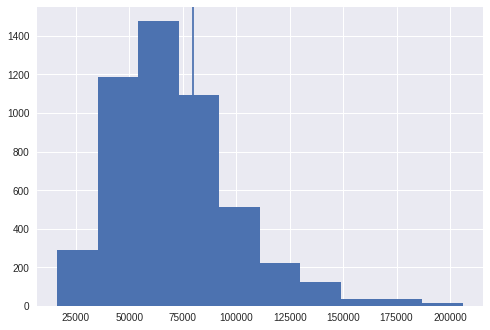

In [66]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

import matplotlib.pyplot as plt
st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)

plt.hist(st_devs)
plt.axvline(standard_deviation(houses['SalePrice']))

# 10 - Standard Notation

It looks like Bessel's correction added some visible improvements and partially corrected the underestimation problem:

<img width="500" src="https://drive.google.com/uc?export=view&id=1Bxxtf1bIfOnZ1zgLghoGs4QiNzfXX3iq">


The improvement brought by Bessel's correction is more obvious when we compare the average values of the two distributions above. The mean of the 5000 sample standard deviations without Bessel's correction is roughly 71304, while the mean standard deviation of the sample standard deviations having the correction is roughly 75161. This is significantly closer to the population standard deviation, which is approximately 79887.


We could decrease the denominator more (dividing by $n-2$ maybe) to try improving the correction. However, we need a single mathematical definition for the sample standard deviation, and we have to choose between $n$, $n-1$, $n-2$, etc. Remember that in practice we don't know the population standard deviation, so we can't tell which correction would work best for each sample standard deviation.

Statisticians agree that $n-1$ is the best choice for the sample standard deviation formula, and we'll explore a strong argument in support of this in the next screen.

Now that we have know what formulae to use for samples and populations, we introduce some standard notation that will help you understand other statistics resources. The population standard deviation is denoted with the Greek letter  $\sigma$ (read "sigma", or "lowercase sigma"):

$$
\sigma = \sqrt{\frac{(x_1 - \mu)^2 + (x_2 - \mu)^2 + \ldots + (x_N - \mu)^2}{N}} = \sqrt{\frac{\displaystyle \sum_{i=1}^{N} (x_i - \mu)^2}{N}}
$$


Remember that the population standard deviation $\sigma$  is just the square root of the population variance. For this reason, the population variance is written as $\sigma^2$ (such that taking the square root of the variance $\sigma^2$ results in the standard deviation $\sigma$: $\sqrt{\sigma^2}=\sigma$):

$$
\sigma^2 = \frac{(x_1 - \mu)^2 + (x_2 - \mu)^2 + \ldots + (x_N - \mu)^2}{N} = \frac{\displaystyle \sum_{i=1}^{N} (x_i - \mu)^2}{N}
$$


The sample standard deviation is simply denoted with $s$, while the sample variance is denoted with $s^2$ (also notice Bessel's correction in the denominator):


<img width="500" src="https://drive.google.com/uc?export=view&id=1RJkvnRbRHyP2KIKmfRzbGtrxNmNN0dMp">

The main takeaway is that we need to use the $s$ and $s^2$ formulae (with Bessel's correction) for samples. For populations, we can use the $\sigma$ or  $\sigma^2$ formulae (without Bessel's correction).

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- We already sampled our data set and saved the sample in a variable named **sample.**
  - Use the [Series.std()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.std.html) method to compute the sample standard deviation for the **SalePrice** column. You can use the **ddof** parameter to choose between $n$ and $n-1$. Save the result to a variable named **pandas_stdev.**
  - Use the [numpy.std()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html) function to compute the sample standard deviation for the **SalePrice** column. You can use the **ddof** parameter to choose between $n$ and $n-1$. Save the result to a variable named **numpy_stdev.**
  - Compare **pandas_stdev** with **numpy_stdev** using the == operator. Assign the result of the comparison to a variable named **equal_stdevs.**
  - Use the **Series.var()** method to compute the sample variance for the **SalePrice** column. Assign the result to **pandas_var.**
  - Use the **numpy.var()** function to compute the sample variance for the **SalePrice** column. Assign the result to **numpy_var.**
  - Compare **pandas_var** with **numpy_var** using the == operator. Assign the result of the comparison to a variable named **equal_vars.**

In [68]:
sample = houses.sample(100, random_state = 1)
from numpy import std, var

pandas_stdev = houses["SalePrice"].std()
numpy_stdev = std(houses["SalePrice"])
equal_stdevs = pandas_stdev == numpy_stdev
print(equal_stdevs)

False


In [69]:
pandas_var = houses["SalePrice"].var()
numpy_var = var(houses["SalePrice"])
equal_vars = pandas_var == numpy_var
print(equal_vars)

False


# 11 - Sample Variance — Unbiased Estimator

In the previous screen, we stated that statisticians agree that $n-1$  is better than $n$  or $n-2$ for computing the sample standard deviation $s$. An argument supporting this comes from the fact that the sample variance $s^2$  (which uses $n-1$) is an **unbiased estimator** for the population variance $\sigma^2$. Since standard deviation is just the square root of variance, it makes sense to use $n-1$ as well (although standard deviation is not an unbiased estimator, as we'll see).

As we learned previously when we discussed the mean, we call a statistic an unbiased estimator when that statistic is equal on average to the parameter it estimates. Remember that the sample mean $\overline{x}$  is an unbiased estimator for the population mean $\mu$  no matter whether we sample with or without replacement. The sample variance $s^2$  is an unbiased estimator for the population variance $\sigma^2$ only when we sample with replacement. In the diagram below, we will:

- Take all possible samples of size $n=2$  from the population $[0,3,6]$ with $\sigma^2=6$ .
- Compute the sample variance $s^2$ for each sample.
- Take the mean of all the sample variances $s^2$ . You can see that the mean is 6, which is the same as the population variance $\sigma^2$, which shows that the sample variance  $s^2$ is an unbiased estimator for the population variance $\sigma^2$.

<img width="300" src="https://drive.google.com/uc?export=view&id=1edozHcIsz32Da_2yNLH-lExQ1BKtkk7t">

Although the sample variance $s^2$  is an unbiased estimator, and the sample standard deviation $s$ is basically $\sqrt{s^2}$, the unbiasedness doesn't carry over ($\sigma$ is roughly 2.45 for the population $[0,3,6]$).


<img width="300" src="https://drive.google.com/uc?export=view&id=1mROVmvyTedV1awalmFhfNnIJbY6pS3_M">


In the exercise below, we'll see that the sample variance $s^2$  and the sample standard deviation $s$ are biased when we sample without replacement.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- In the cell below, you can see all the possible samples of size $n=2$ for the population $[0,3,6]$ when we sample without replacement.
  - Compute the sample variance and sample standard deviation for each sample.
  - Take the mean of all the sample variances. Compare the mean variance with the population variance (which you'll have to compute) using the == operator, and assign the result to a variable **equal_var.**
    - If the sample variance is biased in this case, the result should be **False**.
  - Take the mean of all the sample standard deviations. Compare the mean standard deviation with the population standard deviation using the == operator, and assign the result to **equal_stdev.**
    - If the sample variance is biased in this case, the result should be **False.**

In [0]:
population = [0, 3, 6]

samples = [[0,3], [0,6],
           [3,0], [3,6],
           [6,0], [6,3]
          ]

variances = []
standard_deviation = []

for sample in samples:
  variances.append(var(sample))
  standard_deviation.append(std(sample))

In [72]:
mean_variance = np.mean(variances)
equal_var = mean_variance == np.mean(population)
print(equal_var)

False


In [73]:
mean_standard_deviation = np.mean(standard_deviation)
equal_stdev = mean_standard_deviation == std(population)
print(equal_stdev)

False


In [0]:
population = [0, 3, 6]

samples = [[0,3], [0,6],
           [3,0], [3,6],
           [6,0], [6,3]
          ]
from numpy import var, std

pop_var = var(population, ddof = 0)
pop_std = std(population, ddof = 0)

st_devs = []
variances = []

for sample in samples:
    st_devs.append(std(sample, ddof = 1))
    variances.append(var(sample, ddof = 1))
    
mean_std = sum(st_devs) / len(st_devs)
mean_var = sum(variances) / len(variances)

equal_stdev = pop_std == mean_std
equal_var = pop_var == mean_var

In [0]:
equal_stdev

False

# 12 - Next Steps

In this lesson, we learned how to measure the **variability** of a distribution using the **range**, the **mean absolute deviation**, the **variance**, and the **standard deviation**. These metrics are ideal for measuring the variability of distributions whose values are measured on an interval or ratio scale.

Measuring variability for ordinal and nominal data is much harder because we can't quantify the differences between values. For this reason, little is written in the literature about measuring variability for ordinal and nominal data. If you want to dig more into this, you can start by reading [this paper](https://www.tandfonline.com/doi/full/10.1080/10691898.2007.11889465).

Next in this course, we'll build on what we know about the mean and the standard deviation and learn about **z-scores.**